In [1]:
import os
import numpy as np
import pandas as pd
import tifffile as tif
import matplotlib.pyplot as plt

import umap
import umap.plot
import plotly.express as px

/home/sergei.pnev/miniconda3/envs/medfuncta/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/sergei.pnev/miniconda3/envs/medfuncta/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/sergei.pnev/miniconda3/envs/medfuncta/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than

In [ ]:
df_orig = pd.read_csv("/raid/cian/user/sergei.pnev/data/JUMP/cpg0004-lincs/metadata_old/top50_moa_with_dmso_filtered.csv")
d = {v:k.split("@")[0] for k,v in zip(df_orig["Treatment"].unique(), df_orig["Treatment_ID"].unique())}

df_names = pd.read_excel("/raid/cian/user/sergei.pnev/data/JUMP/cpg0004-lincs/metadata_old/mmc4.xlsx")

d_compounds = {k:v for k,v in zip(df_names["broad_id"].values, df_names["name"].values)}
d_moa = {k:v for k,v in zip(df_names["broad_id"].values, df_names["moa"].values)}
d_target = {k:v for k,v in zip(df_names["broad_id"].values,df_names["target"].values)}

In [2]:
compound_list = ["AZD2014", "alisertib", "MEK162", "TAK-285"]
codes_list = ["BRD-K99113996-001-02-0", "BRD-K75295174-001-05-0", "BRD-K82244583-001-01-3", "BRD-K80343549-001-02-6"]

In [53]:
root = "/raid/cian/user/sergei.pnev/data/JUMP/cpg0004-lincs/metadata"
root_img = "/raid/cian/user/sergei.pnev/data/JUMP/cpg0004-lincs/inputs/"
save_dir = "/raid/cian/user/sergei.pnev/data/JUMP/cpg0004-lincs/inputs_sc_tif"

In [2]:
df = pd.read_csv(root + "/df_withDMSO_withCrops_filtered_v3.csv")
df_dmso = df[df["Metadata_broad_sample"] == "DMSO"].reset_index(drop=True)

NameError: name 'root' is not defined

In [13]:
df.head()

,Unnamed: 0,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_broad_sample,Metadata_moa,Metadata_mmoles_per_liter,Metadata_dose_recode,RNA,ER,...,Treatment,Plate_Map_Name,Split,Metadata_broad_sample_ID,Metadata_moa_ID,Metadata_Plate_ID,replicate_ID,combined_paths,Unique_well,crops
0,0,SQ00014812,A07,1,BRD-K74363950-004-01-0,acetylcholine receptor antagonist,10.0,6,SQ00014812/r01c07f01p01-ch3sk1fk1fl1.tiff,SQ00014812/r01c07f01p01-ch2sk1fk1fl1.tiff,...,BRD-K74363950-004-01-0@9.99999999999999999,C-7161-01-LM6-022,Training,1259,16,0,1.0,"SQ00014812/r01c07f01p01-ch1sk1fk1fl1.png,SQ000...",SQ00014812-A07,"[[8, 710], [11, 856], [14, 839], [19, 646], [1..."
1,1,SQ00014812,A07,2,BRD-K74363950-004-01-0,acetylcholine receptor antagonist,10.0,6,SQ00014812/r01c07f02p01-ch3sk1fk1fl1.tiff,SQ00014812/r01c07f02p01-ch2sk1fk1fl1.tiff,...,BRD-K74363950-004-01-0@9.99999999999999999,C-7161-01-LM6-022,Training,1259,16,0,1.0,"SQ00014812/r01c07f02p01-ch1sk1fk1fl1.png,SQ000...",SQ00014812-A07,"[[13, 655], [14, 184], [17, 475], [18, 109], [..."
2,2,SQ00014812,A07,3,BRD-K74363950-004-01-0,acetylcholine receptor antagonist,10.0,6,SQ00014812/r01c07f03p01-ch3sk1fk1fl1.tiff,SQ00014812/r01c07f03p01-ch2sk1fk1fl1.tiff,...,BRD-K74363950-004-01-0@9.99999999999999999,C-7161-01-LM6-022,Training,1259,16,0,1.0,"SQ00014812/r01c07f03p01-ch1sk1fk1fl1.png,SQ000...",SQ00014812-A07,"[[16, 112], [15, 246], [15, 598], [19, 929], [..."
3,3,SQ00014812,A07,4,BRD-K74363950-004-01-0,acetylcholine receptor antagonist,10.0,6,SQ00014812/r01c07f04p01-ch3sk1fk1fl1.tiff,SQ00014812/r01c07f04p01-ch2sk1fk1fl1.tiff,...,BRD-K74363950-004-01-0@9.99999999999999999,C-7161-01-LM6-022,Training,1259,16,0,1.0,"SQ00014812/r01c07f04p01-ch1sk1fk1fl1.png,SQ000...",SQ00014812-A07,"[[18, 1041], [14, 788], [17, 861], [19, 775], ..."
4,4,SQ00014812,A07,5,BRD-K74363950-004-01-0,acetylcholine receptor antagonist,10.0,6,SQ00014812/r01c07f05p01-ch3sk1fk1fl1.tiff,SQ00014812/r01c07f05p01-ch2sk1fk1fl1.tiff,...,BRD-K74363950-004-01-0@9.99999999999999999,C-7161-01-LM6-022,Training,1259,16,0,1.0,"SQ00014812/r01c07f05p01-ch1sk1fk1fl1.png,SQ000...",SQ00014812-A07,"[[18, 769], [17, 974], [24, 959], [26, 424], [..."


In [8]:
plates = df[df["Metadata_broad_sample"].isin(codes_list)].Metadata_Plate_ID.unique()

In [16]:
df_sample = df[df["Metadata_broad_sample"].isin(codes_list)].reset_index(drop=True)
df_dmso_sample = df_dmso[df_dmso["Metadata_Plate_ID"].isin(plates)].reset_index(drop=True)

In [28]:
import skimage

def load_img(root_dir, paths):
    full = np.zeros((1080, 1080, 5))
    for i, path in enumerate(paths):
        full[:, :, i] = skimage.io.imread(root_dir + path)
    return full.astype(np.uint8)

In [48]:
for idx, row in df_sample.iterrows():
    plate = row["Metadata_Plate"]
    well = row["Metadata_Well"]
    site = row["Metadata_Site"]
    paths = row["combined_paths"].split(",")

    img = load_img(root_img, paths)
    df_crops = pd.read_csv(root + f"/{plate}/{well}-{site}-Nuclei.csv")
    
    if idx == 1:
        break

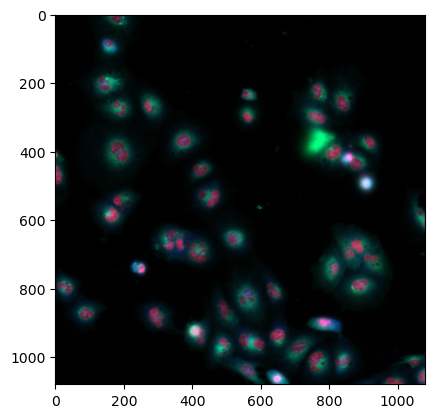

In [49]:
plt.imshow(img[..., :3])

In [50]:
def extract_cell_crop_if_inside(img, center_x, center_y, crop_size=96):
    H, W, _ = img.shape
    half_size = crop_size // 2

    x1 = center_x - half_size
    x2 = center_x + half_size
    y1 = center_y - half_size
    y2 = center_y + half_size

    if x1 < 0 or x2 > W or y1 < 0 or y2 > H:
        return None 

    return img[y1:y2, x1:x2, :]

In [66]:
x_coords, y_coords = df_crops["Nuclei_Location_Center_X"].values, df_crops["Nuclei_Location_Center_Y"].values

crops = []
crops_coords = []

plate_save_dir = save_dir + f"/{plate}"
if not os.path.isdir(plate_save_dir):
    os.makedirs(plate_save_dir, exist_ok=True)

for x, y in zip(x_coords, y_coords):
    x, y = int(x), int(y)
    img_crop = extract_cell_crop_if_inside(img, x, y)
    if img_crop is not None:
        crops_coords.append([x, y])
        crops.append(img_crop)
        tif.imwrite(f"{plate_save_dir}/{well}-{site}-{x}-{y}.tif", img_crop)

In [60]:
save_dir + f"/{plate}"

'/raid/cian/user/sergei.pnev/data/JUMP/cpg0004-lincs/inputs_sc_tif/SQ00014820'

In [69]:
example = tif.imread(f"{plate_save_dir}/{well}-{site}-{781}-{1019}.tif")
example.shape

(96, 96, 5)

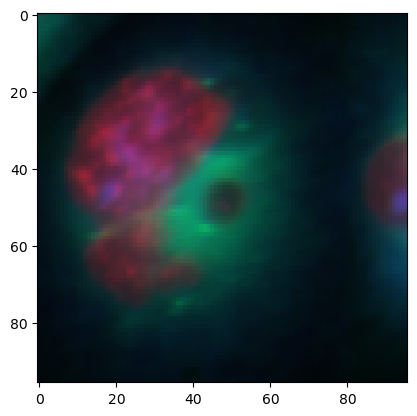

In [70]:
plt.imshow(example[..., :3])

# Combine everything

In [84]:
df_crops_list = []
for idx, row in df_dmso_sample.iterrows():
    if idx % 10 == 0:
        print(idx, len(df_dmso_sample))
    plate = row["Metadata_Plate"]
    well = row["Metadata_Well"]
    site = row["Metadata_Site"]
    paths = row["combined_paths"].split(",")

    img = load_img(root_img, paths)
    df_crops = pd.read_csv(root + f"/{plate}/{well}-{site}-Nuclei.csv")

    x_coords, y_coords = df_crops["Nuclei_Location_Center_X"].values, df_crops["Nuclei_Location_Center_Y"].values
    
    crops = []
    crops_coords = []
    
    plate_save_dir = save_dir + f"/{plate}"
    if not os.path.isdir(plate_save_dir):
        os.makedirs(plate_save_dir, exist_ok=True)
    
    for x, y in zip(x_coords, y_coords):
        x, y = int(x), int(y)
        img_crop = extract_cell_crop_if_inside(img, x, y)
        if img_crop is not None:
            crops_coords.append([x, y])
            crops.append(img_crop)
            tif.imwrite(f"{plate_save_dir}/{well}-{site}-{x}-{y}.tif", img_crop)
            
    df_crops_list.append(crops_coords)

0 3240
10 3240
20 3240
30 3240
40 3240
50 3240
60 3240
70 3240
80 3240
90 3240
100 3240
110 3240
120 3240
130 3240
140 3240
150 3240
160 3240
170 3240
180 3240
190 3240
200 3240
210 3240
220 3240
230 3240
240 3240
250 3240
260 3240
270 3240
280 3240
290 3240
300 3240
310 3240
320 3240
330 3240
340 3240
350 3240
360 3240
370 3240
380 3240
390 3240
400 3240
410 3240
420 3240
430 3240
440 3240
450 3240
460 3240
470 3240
480 3240
490 3240
500 3240
510 3240
520 3240
530 3240
540 3240
550 3240
560 3240
570 3240
580 3240
590 3240
600 3240
610 3240
620 3240
630 3240
640 3240
650 3240
660 3240
670 3240
680 3240
690 3240
700 3240
710 3240
720 3240
730 3240
740 3240
750 3240
760 3240
770 3240
780 3240
790 3240
800 3240
810 3240
820 3240
830 3240
840 3240
850 3240
860 3240
870 3240
880 3240
890 3240
900 3240
910 3240
920 3240
930 3240
940 3240
950 3240
960 3240
970 3240
980 3240
990 3240
1000 3240
1010 3240
1020 3240
1030 3240
1040 3240
1050 3240
1060 3240
1070 3240
1080 3240
1090 3240
1100 3240
1

In [85]:
df_dmso_sample["crops"] = df_crops_list

In [86]:
df_dmso_sample.head()

,Unnamed: 0,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_broad_sample,Metadata_moa,Metadata_mmoles_per_liter,Metadata_dose_recode,RNA,ER,...,Treatment,Plate_Map_Name,Split,Metadata_broad_sample_ID,Metadata_moa_ID,Metadata_Plate_ID,replicate_ID,combined_paths,Unique_well,crops
0,26334,SQ00014820,A01,1,DMSO,unknown,0.0,0,SQ00014820/r01c01f01p01-ch3sk1fk1fl1.tiff,SQ00014820/r01c01f01p01-ch2sk1fk1fl1.tiff,...,DMSO@NA,C-7161-01-LM6-024,Training,1570,591,8,1.0,"SQ00014820/r01c01f01p01-ch1sk1fk1fl1.png,SQ000...",SQ00014820-A01,"[[532, 54], [709, 73], [51, 75], [422, 75], [5..."
1,26335,SQ00014820,A01,2,DMSO,unknown,0.0,0,SQ00014820/r01c01f02p01-ch3sk1fk1fl1.tiff,SQ00014820/r01c01f02p01-ch2sk1fk1fl1.tiff,...,DMSO@NA,C-7161-01-LM6-024,Training,1570,591,8,1.0,"SQ00014820/r01c01f02p01-ch1sk1fk1fl1.png,SQ000...",SQ00014820-A01,"[[780, 49], [392, 49], [179, 56], [558, 60], [..."
2,26336,SQ00014820,A01,3,DMSO,unknown,0.0,0,SQ00014820/r01c01f03p01-ch3sk1fk1fl1.tiff,SQ00014820/r01c01f03p01-ch2sk1fk1fl1.tiff,...,DMSO@NA,C-7161-01-LM6-024,Training,1570,591,8,1.0,"SQ00014820/r01c01f03p01-ch1sk1fk1fl1.png,SQ000...",SQ00014820-A01,"[[389, 50], [811, 51], [435, 54], [718, 57], [..."
3,26337,SQ00014820,A01,4,DMSO,unknown,0.0,0,SQ00014820/r01c01f04p01-ch3sk1fk1fl1.tiff,SQ00014820/r01c01f04p01-ch2sk1fk1fl1.tiff,...,DMSO@NA,C-7161-01-LM6-024,Training,1570,591,8,1.0,"SQ00014820/r01c01f04p01-ch1sk1fk1fl1.png,SQ000...",SQ00014820-A01,"[[71, 50], [287, 57], [361, 80], [153, 90], [4..."
4,26338,SQ00014820,A01,5,DMSO,unknown,0.0,0,SQ00014820/r01c01f05p01-ch3sk1fk1fl1.tiff,SQ00014820/r01c01f05p01-ch2sk1fk1fl1.tiff,...,DMSO@NA,C-7161-01-LM6-024,Training,1570,591,8,1.0,"SQ00014820/r01c01f05p01-ch1sk1fk1fl1.png,SQ000...",SQ00014820-A01,"[[1017, 48], [953, 54], [738, 60], [702, 62], ..."


In [87]:
df_dmso_sample.to_csv(root + "/dfDMSO4CancerCompounds.csv")